# Assignment 1

Answer the following questions in this jupyter notebook.  

For code: write clear code that you can understand and debug, but know that neither I nor the grader want to read it!  Instead, explain what your code does.



# Question 1

Implement the extended euclidean algorithm, as well as the fast powering (repeated squaring) algorithm.  

Use both algorithms to compute the inverse of $a$ modulo $p$, where

$$a = 6414774113292357638522885053235152690521$$ and $$p = 10000000000000000000000000000000000000121$$

I think that $p$ is a prime.

If everything's working you'll get the same answer, which also might be a number you sort of recognize, because I have a sense of math humor.

In [42]:
import math as math
import sys
def gcdex(a, b):
    p1 = 1
    q1 = 0
    h1 = a
    p2 = 0
    q2 = 1
    h2 = b
    while h2 != 0:
        r = h1 // h2
        p3 = p1 - r * p2
        q3 = q1 - r * q2
        h3 = h1 - r * h2
        p1 = p2
        q1 = q2
        h1 = h2
        p2 = p3
        q2 = q3
        h2 = h3
    return [p1, q1, h1]
def faster(a,p):
    square = a
    answer = 1
    p2 = p - 2
    while p2 > 0:
        if p2 % 2 == 1:
            p2 -= 1
            answer *= square
            answer %= p
        p2//=2
        square = square**2 % p
    return answer
a = 6414774113292357638522885053235152690521
p = 10000000000000000000000000000000000000121
gcd = gcdex(a,p)
print(str(a) + "*" + str(gcd[0]) + " + " + str(p) + "*" + str(gcd[1]) + " = " + str(gcd[2]))
print("The inverse of a^p is " + str(gcd[0]))
# As we can see in the GCDEX algorithm here, we can reduce the term with p because we are working mod p. This means
# a * 314159265358979323846 is congruent to 1 mod p. By this, we can deduce that 314159265358979323846 must be the 
# modular inverse of a mod p and therefore is equal to a^(p-1) mod p.
print(faster(a,p))
# In the fast powering algorithm, we can test the our GCDEX algorithm worked properly by determing if a^(p-1) is 
# equivalent to the output described above in our GCDEX algorithm
# Indeed it is, therefore a^(p-1) is congruent to 314159265358979323846 mod p.

6414774113292357638522885053235152690521*314159265358979323846 + 10000000000000000000000000000000000000121*-201526072287572507965 = 1
The inverse of a^p is 314159265358979323846
314159265358979323846


# Question 2
You can do linear algebra with modular arithmetic! Let $p$ be a prime.  Let $\vec b$ be a vector of length $n$ whose entries are in $\mathbb{Z}/p\mathbb{Z}$, and let $A$ be an $n \times n$ matrix, whose entries are in $\mathbb{Z}/p\mathbb{Z}$.

Explain how to find a vector $\vec x$, whose entries are in $\mathbb{Z}/p\mathbb{Z}$, such that $A\vec x \equiv \vec b$ (mod $p$), significantly faster than a brute-force search.

Then, test your techinques by solving the equation
$$
\left[\begin{array}{rrrr}
1 & 1 & 1 & 1 \\
1 & 2 & 4 & 3 \\
1 & 3 & 4 & 2 \\
1 & 4 & 1 & 4
\end{array}\right]
\vec x \equiv
\left[\begin{array}{r}
3 \\
3 \\
1 \\
1
\end{array}\right]
\qquad \pmod{5}
$$
You can do this by code (say, by teaching numpy to do modular arithmetic, or using some library - but please don't use any libraries that aren't in Anaconda, so we can run your code). Or, you can do it by hand - whatever's easier or more interesting for you.  

Note: when you're done, the entries of $x$ should be integers between 0 and 4!  If there's fractions, you're doing it wrong.




Here is the link to my file containing the row reduction process. I tested my result to make sure that Ax = b
https://drive.google.com/file/d/1F9jTKlh9hhEoJ62y1CJhwFfnyb-9VjE3/view?usp=share_link

# Question 3

In this question, we'll do a little hands-on algebraic number theory, with the Eisenstein integers.  Along the way, we'll draw some pictures of hexagons, my favorite shape.

Let $\mathbb{C} = \mathbb{R} + \mathbb{R}i$ denote the complex numbers (so $i^2 = -1$).  If this is new to you, you should do some poking around on wikipedia to learn how to add and multiply complex numbers, and what it means to draw "the complex plane".  Complex numbers are built into python and numpy, though they may use the symbol "j" instead of $i$.

a) Let $\omega = \frac{-1 + i\sqrt{3}}{2}$.  Verify, by hand or by code, that $\omega^3 = 1$.  We call $\omega$ a "complex third root of unity".

b) Let $R = \mathbb{Z} + \mathbb{Z}\omega = \{a + b \omega \;:\; a,b \in \mathbb{Z} \}.$  Use matplotlib.pyplot to draw a scatterplot of $R$ in the complex plane (include all $z \in R$ for which the real and imaginary parts of $z$ are are at most 4 in absolute value), and label which of these points is $\omega$.

c) Explain why, given $z \in \mathbb{C}$, I can always find $u \in R$ with $|z - u| \leq \frac{1}{2}$, where $|\cdot|$ denotes the usual complex norm. Illustrate this with a Voronoi diagram - you might want to use scipy.spatial.Voronoi for this purpose.  See wikipedia for definitions of the words in this question.

d) Given $a, b \in R$, explain how to find $q, r \in R$ such that $|r| < \frac{1}{2}|b|$ and $a = bq+r$.


Part (d) says that R has a thing like the division algorithm.  As a result, R also has an extended Euclidean algorithm, so its "primes" are the same as its "irreducibles", following the arguments we did in class.  Thus it is  nearly as nice as $\mathbb{Z}$.  This is a very special situation, though!  If you replace $\omega$ with some other number, it seldom works as nicely.


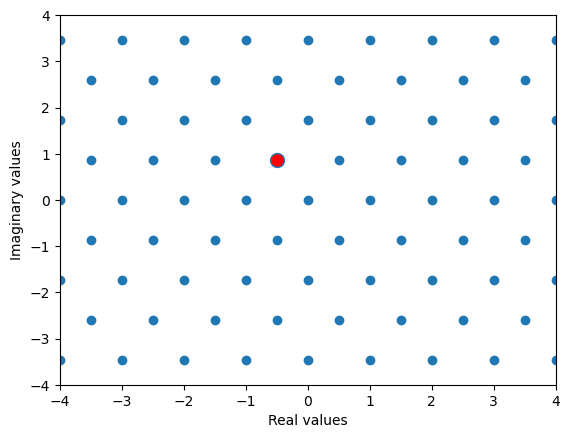

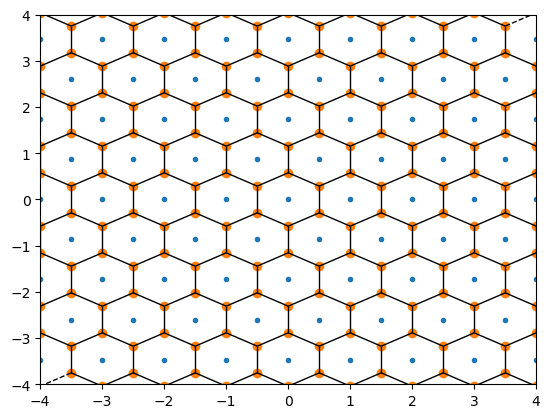

In [38]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
# Creating an array of integers to be passed into x + yw
x = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
y = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
# Setting up my w variable
w = (-1 + math.sqrt(3)*1j)/2
# Creating a new array to hold numbers in the complex plane
wxy = []
# Setting each element of wxy to be x_i + y_i * w to extend over a small portion of the complex plane
for x1 in x:
    for y1 in y:
        y = y1 * w
        wxy.append(x1+y1)
# Creating two plotting variable in the Real Number plane to represent the real and complex value pairs
x_plot = [ele.real for ele in wxy]
y_plot = [ele.imag for ele in wxy]
# Creating an array of tuples to be used in the Voronoi diagram
xy = []
# Setting each tuple into xy to later plot xy using a Voronoi diagram
for i in range(len(x_plot)):
        xy.append([x_plot[i], y_plot[i]])
# Creating a scatter plot in the Real Number plane to represent the complex values
plt.scatter(x_plot, y_plot)
# Plotting w in the plane
plt.plot(w.real, w.imag, marker="o", markersize=10, markerfacecolor="red")
plt.xlabel("Real values")
plt.ylabel("Imaginary values")
# Constraining the field of view
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
# Creating a Voronoi diagram using the real and imaginary parts of xy
vor = Voronoi(xy)
# Plotting the figure using scipy
fig = voronoi_plot_2d(vor)
# Constraining the field of view
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()





Here is my text explaining my process for part c and d.
https://drive.google.com/file/d/15oWptB2akZ6kRsLz_LRti5kuX7Xy3CsM/view?usp=share_link
